<a href="https://colab.research.google.com/github/Eleftheria94/Text-Mining-Project-2021/blob/main/BiLSTM_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup 
import numpy as np
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action = 'ignore', category = FutureWarning)

from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers.embeddings import Embedding


max_features = 20000  # Only consider the top 20k words
max_len = 200 # Only consider the first 200 words of each movie review

# Build the model

# Input for variable-length sequences of integers
inputs = keras.Input(shape = (None,), dtype = "int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

In [ ]:
# Load the IMDB movie review sentiment data
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words = max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

# Use pad_sequence to standardize sequence length:
# This will truncate sequences longer than 200 words and zero-pad sequences 
# shorter than 200 words.
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen = max_len)

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
# Train and evaluate the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 32, 
                    epochs = 2, 
                    validation_data = (x_val, y_val))

Epoch 1/2
782/782 [==============================] - 443s 558ms/step - loss: 0.3367 - accuracy: 0.8607 - val_loss: 0.3158 - val_accuracy: 0.8683
Epoch 2/2
782/782 [==============================] - 426s 545ms/step - loss: 0.1924 - accuracy: 0.9291 - val_loss: 0.3367 - val_accuracy: 0.8567


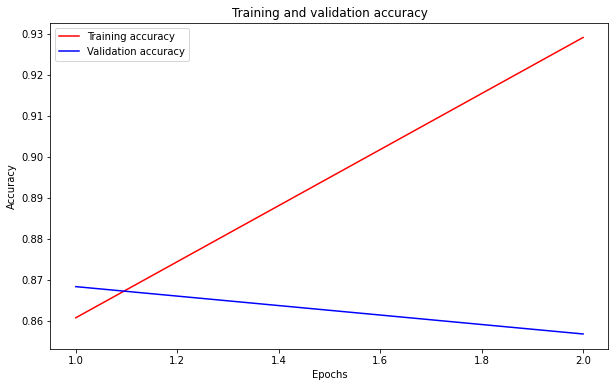

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.plot(epochs, acc, '-r', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
scores = model.evaluate(x_val, y_val, batch_size = 32, verbose = 0)
print('Test loss: %.4f' % scores[0])
print('Test accuracy: %.4f' % scores[1])

Test loss: 0.3367
Test accuracy: 0.8567
